# Simple Emotion Classifier App

### - Emotion Detection based on Text
### - Text Classifier

In [3]:
# Load EDA Packages
import pandas as pd
import numpy as np

# Import Data Viz Packages
import seaborn as sns

# Load Text Cleaning Packages
import neattext.functions as nfx

# Load ML Packages
# -Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# -Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Load datasets
df = pd.read_csv("emotion_dataset.csv")

In [12]:
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                NaN  
1                     Sage Act upgrade list tommorow  
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3  eye  true hazel eyeand brilliant  Regular feat...  
4    ugh babe hugggzzz u  babe naamazed nga ako e...

In [13]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

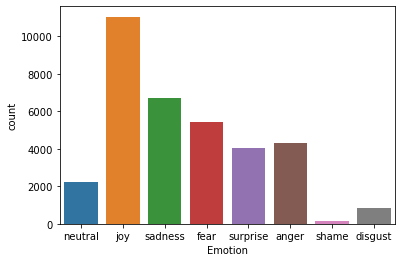

In [14]:
sns.countplot(x='Emotion', data = df)

In [18]:
# Data Cleaning

# Remove User Handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [19]:
# Remove Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [22]:
# Remove Special Characters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [23]:
df

Unnamed: 0   Emotion  \
0               0   neutral   
1               1       joy   
2               2   sadness   
3               3       joy   
4               4       joy   
...           ...       ...   
34787       34787  surprise   
34788       34788       joy   
34789       34789     anger   
34790       34790      fear   
34791       34791   sadness   

                                                    Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
34787  @MichelGW have you gift! Hope you like it! It'...   
34788  The world didnt give it to me..so the world MO...   
34789                           A man robbed me today .    
34790  Youu call it JEALOUSY, I call it of #Losing YO...   
34791  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4      ugh babe hugggzzz u  babe naamazed nga ako e b...  
...                                                  ...  
34787         gift Hope like it hand wear  Itll warm Lol  
34788         world didnt meso world DEFINITELY cnt away  
34789                                  man robbed today   
34790                           Youu JEALOUSY Losing YOU  
34791                              think baby dream time  

[34792 rows x 4 columns]

In [24]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [25]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size = 0.3, random_state = 42)

In [26]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [32]:
# Logistic Regression Pipeline
pipe_lr = Pipeline(steps = [('cv', CountVectorizer()),('lr', LogisticRegression())])

In [33]:
# Train and Fit Data
pipe_lr.fit(x_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [35]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [34]:
# Check Accuracy
pipe_lr.score(x_test, y_test)

0.6215750143705691

In [37]:
# Make Prediction
ex1 = "This book was so interesting and it made me awesome"

In [38]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [39]:
# Prediction probability
pipe_lr.predict_proba([ex1])

array([[5.85434622e-03, 2.19643427e-02, 2.37874549e-01, 6.77584704e-01,
        2.59812151e-05, 4.45191736e-02, 1.76410198e-04, 1.20004927e-02]])

In [40]:
# To know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [41]:
# Save model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_3_sept_2021.pkl","wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()